# Deep Neural Networks

## Author - Rodolfo Lerma

# Problem:
Using the CIFAR-10 dataset, create a new notebook to build a TensorlLow model.


# Abstract:
You start working for a new startup building the next generation search engine. The search engine provides the ability to search images with their content. You are tasked to build a machine learning model that is able to identify the objects in images. The model you are building will help in providing the capability to search for 10 objects. Download the L09_ImageClasses.pdf to see a list of the classes in the dataset and 10 random images from each class.

For this project you will use the CIFAR-10 dataset, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The analysis is is divided the following way:

### Data Exploration
- **Background information**
- **Loading data**
- **Formatting names of target variable**
- **Example of the data for the model**

### Analysis
- **Models**
    - Options for some Hyperparaters
    - Based Model
    - Adjusted Model
    - Prediction examples
          
### Summary of Findings

# Data Exploration 

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

#import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = tf.keras.datasets.cifar10

## Background information

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The classes in the data set represent the following:
- airplane
- automobile
- bird
- cat
- deer
- dog
- frog
- horse
- ship
- truck

The classes are completely mutually exclusive. There is no overlap between automobiles and trucks. "Automobile" includes sedans, SUVs, things of that sort. "Truck" includes only big trucks. Neither includes pickup trucks. 

In [3]:
(x_train, y_train), (x_test, y_test) = data.load_data()

## Loading data

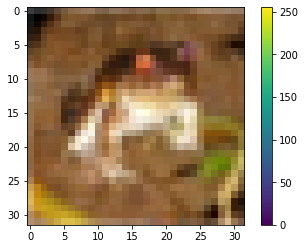

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

We notice that the image is 255 x 255 pixels. As a result, we will scale the values to range between 0 and 1, and thus we will divide by 255.0.

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

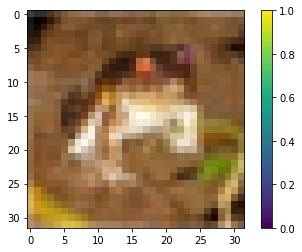

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Formatting names of target variable

Based on the documentation for the used data set from Keras more descriptive names were added.

In [7]:
def names_function(y_train):
    names = []
    for i in y_train:
        if i == 1:
            j = 'car'
        elif i == 2:
            j = 'bird'
        elif i == 3:
            j = 'cat'
        elif i == 4:
            j = 'deer'
        elif i == 5:
            j = 'dog'
        elif i == 6:
            j = 'frog'
        elif i == 7:
            j = 'horse'
        elif i == 8:
            j = 'ship'
        elif i == 9:
            j = 'truck'
        elif i == 0:
            j = 'airplane'
        names.append(j)
    return names

In [8]:
names_train = names_function(y_train)

In [9]:
names_test = names_function(y_test)

## Example of the data for the model

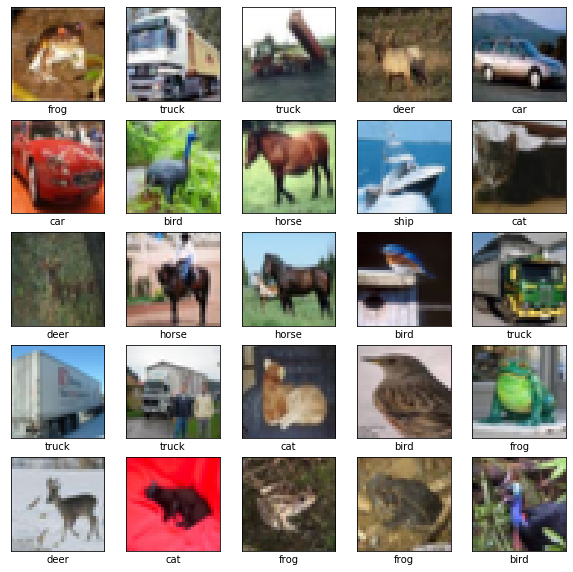

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(names_train[i])
plt.show()

# Analysis

For this assignment/example even though a better approach would have been to do a **grid search** to find the optimal hyperparameters, just to show and exemplify how the model will vary based on these values and the importance of it 3 slightly different cases/models + 1 baseline (1 Hidden layer neural network) would be evaluated.

## Models


### Options for some Hyperparaters: 

From the **TensorFlow** library these are some of the options available:

#### Optimizer:

- `sgd`: Gradient Descent with momentum
- `rmsprop`: Optimizer that implements the RMSprop algorithm
- `optimizer`: Base class for Keras
- `nadam`: NAdam algorithm
- `ftrl`: FTRL algorithm
- `adam`: Adam algorithm
- `adagrad`: Adagrad algorithm
- `adadelta`: Adadelta algorithm


#### Loss options (for classification):

- `BinaryCrossentropy` class
- `CategoricalCrossentropy` class
- `SparseCategoricalCrossentropy` class
- `Poisson` class
- `binary_crossentropy` function
- `categorical_crossentropy` function
- `sparse_categorical_crossentropy` function
- `poisson` function
- `KLDivergence` class
- `kl_divergence` function

#### Metrics (accuracy):

- `Accuracy` class
- `BinaryAccuracy` class
- `CategoricalAccuracy` class
- `TopKCategoricalAccuracy` class
- `SparseTopKCategoricalAccuracy` class

**Others:**

- `AUC` class
- `Precision` class
- `Recall` class
- `TruePositives` class
- `TrueNegatives` class
- `FalsePositives` class
- `FalseNegatives` class
- `PrecisionAtRecall` class
- `SensitivityAtSpecificity` class
- `SpecificityAtSensitivity` class

### Based Model

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    #keras.layers.Dense(50, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer= 'sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 2s 1ms/step - loss: 2.0351 - accuracy: 0.2649
Epoch 2/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8555 - accuracy: 0.3482
Epoch 3/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.8194 - accuracy: 0.3669
Epoch 4/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7984 - accuracy: 0.3729
Epoch 5/50
1563/1563 [==============================] - 2s 999us/step - loss: 1.7857 - accuracy: 0.3795
Epoch 6/50
1563/1563 [==============================] - 2s 987us/step - loss: 1.7643 - accuracy: 0.3866
Epoch 7/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7511 - accuracy: 0.3893
Epoch 8/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7579 - accuracy: 0.3871
Epoch 9/50
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7513 - accuracy: 0.3904
Epoch 10/50
1563/1563 [==============================] - 2s 998us/step - loss:

In [12]:
test_loss_based, test_acc_based = model.evaluate(x_test, y_test)

print('Test accuracy based model:', test_acc_based)

313/313 [==============================] - 0s 794us/step - loss: 1.8485 - accuracy: 0.3536
Test accuracy based model: 0.35359999537467957


### Adjusted Model

For this model 3 small changes were done:
- The number of layers
- The number of neurons
- The activation function `relu` in hidden layers
- The optimizer from `sgb` to `nadam`

**Note:** 
As mentioned above ideally a more robust approach should be taken such as grid search or random search to find the best hyperparameters as well as the number of layers and neurons per layer and the type of layer, but since the purpose this assignment is to exemplify the use of tensorflow and keras a more simplistic approach would be followed.

In [13]:
#from tensorflow.keras import regularizers

model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model1.fit(x_train, y_train, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 2.0176 - accuracy: 0.2766
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.7074 - accuracy: 0.3891
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6078 - accuracy: 0.4282
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5534 - accuracy: 0.4464
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5220 - accuracy: 0.4548
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4860 - accuracy: 0.4696
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4654 - accuracy: 0.4742
Epoch 8/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4366 - accuracy: 0.4842
Epoch 9/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4161 - accuracy: 0.4947
Epoch 10/50
1563/1563 [==============================] - 11s 7ms/step - l

In [14]:
test_loss, test_acc = model1.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.5492 - accuracy: 0.5002
Test accuracy: 0.5001999735832214


It is clearly seen that we have some overfitting happening as the accuracy from the training data set is way higher than the one coming from the test data set, but still better than the based model.

In [15]:
predictions = model1.predict(x_test)

In [16]:
predictions[0]

array([4.9551688e-02, 3.8321252e-04, 1.2096762e-01, 6.3168746e-01,
       6.5234646e-02, 1.1431988e-01, 1.6947018e-03, 1.2954889e-03,
       1.1482592e-02, 3.3826595e-03], dtype=float32)

In [17]:
np.argmax(predictions[0])

3

In [18]:
y_test[0]

array([3], dtype=uint8)

### Prediction examples

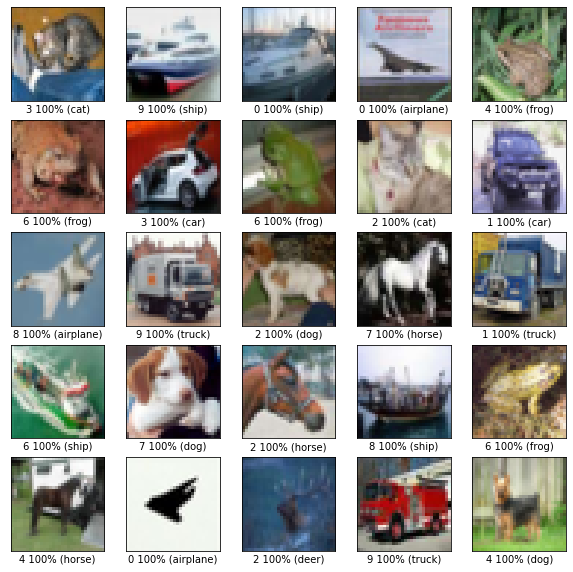

In [19]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), names_test[i]))
plt.show()

# Summary of Findings:

- It is important to notice that while there is an improvement on the adjusted model, that is far from ideal since we the increase in complexity and resources consumption increased quite noticeable compared to the based (more simplistic) model and the improvement in accuracy was not huge.


- Based on the previous point is important to notice that other more robust approach should be followed to explore the best hyperparameters for this, including: number of layers, type of layers (dense, conv, etc.), number of neurons, optimizer, loss function, etc.


- For this particular model it is possible to find a state of the art model that would deliver a result up to 98% in some cases, with some noticeable improvements. That could definitely be explored to understand how the model for this classification problems has been evolving the latest years.


- It is also noticeable that this deep learning model required very specific knowledge in terms of the problem that is being deal with and the specific data available. In all data science projects it is important to have some expert subject matters, but that is especially notorious for any deep learning model.

# Feedback Request:

1. What is the best way or the most practice way of getting hyperparameters for a deep learning model,  especially when using tensorflow and keras?


2. What is the best (or more common) way of knowing the number of layer and neurons for a problem like this one? Knowing that exploring all the combinations is very computationally expensive how do you sample a subset where the probability of higher accuracy is given?


3. In which case make sense to add other kind of deep layers to the model and not only dense layers but others?